# Lab 2 Project (Titanic)
Jason Ballard
19 March 2025

Import the external Python libraries used (e.g., pandas, numpy, matplotlib, seaborn, sklearn and more).

In [4]:
# all imports get moved to the top - import each only once

from sklearn.datasets import load_wine
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

In [8]:
# Load the dataset
wine_data = load_wine()

## Section 1. Import and Inspect the Data

In [7]:
# Convert to a Pandas DataFrame
wine = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine['target'] = wine_data.target  # Add target column

# Display first few rows
print(wine.head())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [9]:
wine.isnull().sum()


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [10]:
print(wine.describe())


          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

In [11]:
print(wine.corr(numeric_only=True))

                               alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   
target                       -0.328222    0.437776 -0.049643   

                              alcalinit

### Reflection 1:
1) How many data instances are there?
2) How many features are there?
3) What are the names?
4) Are there any missing values?
5) Are there any non-numeric features?

6) Are the data instances sorted on any of the attributes?
7) What are the units of age?
8) What are the minimum, median and max age?
9) What two different features have the highest correlation?

10) Are there any categorical features that might be useful for prediction?

# Section 2. Data Exploration and Preparation

## 2.1 Explore Data Patterns and Distributions

array([[<Axes: xlabel='color_intensity', ylabel='color_intensity'>,
        <Axes: xlabel='alcohol', ylabel='color_intensity'>,
        <Axes: xlabel='malic_acid', ylabel='color_intensity'>],
       [<Axes: xlabel='color_intensity', ylabel='alcohol'>,
        <Axes: xlabel='alcohol', ylabel='alcohol'>,
        <Axes: xlabel='malic_acid', ylabel='alcohol'>],
       [<Axes: xlabel='color_intensity', ylabel='malic_acid'>,
        <Axes: xlabel='alcohol', ylabel='malic_acid'>,
        <Axes: xlabel='malic_acid', ylabel='malic_acid'>]], dtype=object)

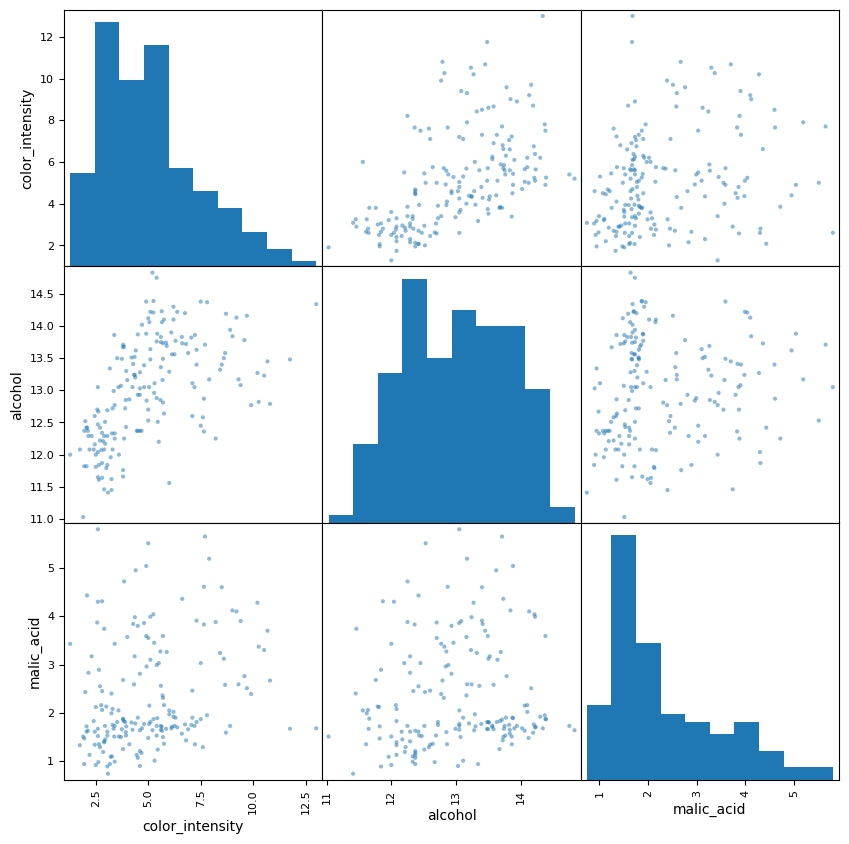

In [12]:
attributes = ['color_intensity', 'alcohol', 'malic_acid']
scatter_matrix(wine[attributes], figsize=(10, 10))

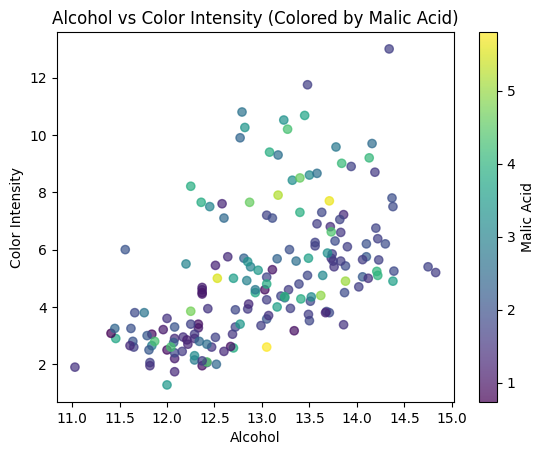

In [13]:
# Scatter plot: Alcohol vs Color Intensity, colored by Malic Acid values
plt.scatter(
    wine['alcohol'], 
    wine['color_intensity'], 
    c=wine['malic_acid'],  # Color by malic acid values
    cmap='viridis',  # Use a color map for better visualization
    alpha=0.7  # Make points slightly transparent
)

# Correct axis labels and title
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.title('Alcohol vs Color Intensity (Colored by Malic Acid)')

# Show the plot
plt.colorbar(label='Malic Acid')  # Add color scale
plt.show()

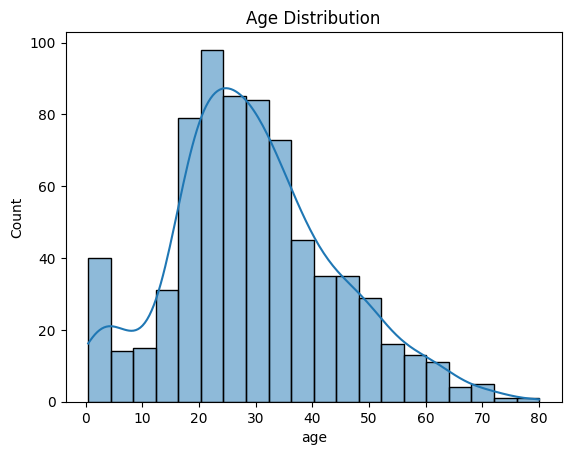

In [10]:
#Create a histogram of age:

sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()

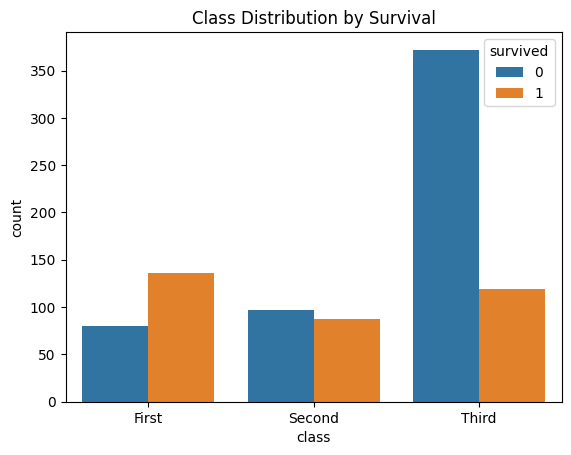

In [11]:
#Create a count plot for class and survival:

sns.countplot(x='class', hue='survived', data=titanic)
plt.title('Class Distribution by Survival')
plt.show()

### Reflection 2.1:

1. What patterns or anomalies do you notice?
2. Do any features stand out as potential predictors?
3. Are there any visible class imbalances?

## 2.2 Handle Missing Values and Clean Data

In [12]:
#missing values for age
titanic['age'].fillna(titanic['age'].median(), inplace=True)

#missing embark town
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)



C:\Users\balla\AppData\Local\Temp\ipykernel_33884\4170630034.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
C:\Users\balla\AppData\Local\Temp\ipykernel_33884\4170630034.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

## 2.3 Feature Engineering

In [13]:
#Create a new feature: Family size

titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

### Reflection 2.3

1. Why might family size be a useful feature for predicting survival?
2. Why convert categorical data to numeric?

# Section 3. Feature Selection and Justification
- Select two or more input features (numerical for regression, numerical and/or categorical for classification)
- Select a target variable (as applicable)
- Classification: Categorical target variable (e.g., gender, species).
- Justify your selection with reasoning.

## 3.1 Choose features and target

In [14]:
# Create a new feature 'family_size' (sum of siblings/spouses and parents/children aboard)
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1  # +1 to include the passenger themselves

# Select relevant features for classification
features = ['age', 'fare', 'pclass', 'sex', 'family_size']
target = 'survived'

# Extract relevant columns
titanic_classification = titanic[features + [target]]

# Encode categorical variable 'sex' (convert 'male'/'female' to 0/1)
titanic_classification['sex'] = titanic_classification['sex'].map({'male': 0, 'female': 1})

# Drop rows with missing values
titanic_classification = titanic_classification.dropna()

# Display the processed dataset
print(titanic_classification.head())

    age     fare  pclass  sex  family_size  survived
0  22.0   7.2500       3    0            2         0
1  38.0  71.2833       1    1            2         1
2  26.0   7.9250       3    1            1         1
3  35.0  53.1000       1    1            2         1
4  35.0   8.0500       3    0            1         0


C:\Users\balla\AppData\Local\Temp\ipykernel_33884\2630674881.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_classification['sex'] = titanic_classification['sex'].map({'male': 0, 'female': 1})


## 3.2 Define X and y

In [15]:
# Assign input features to X
X = titanic[['age', 'fare', 'pclass', 'sex', 'family_size']]
# Assign target variable to y (as applicable)
y = titanic['survived']

### Reflection 3:

1. Why are these features selected?
2. Are there any features that are likely to be highly predictive of survival?

# Section 4. Splitting

## 4.1 Basic Train/Test split 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print('Train size:', len(X_train))
print('Test size:', len(X_test))

Train size: 712
Test size: 179


## 4.2 Stratified Train/Test split

In [17]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    train_set = X.iloc[train_indices]
    test_set = X.iloc[test_indices]

print('Train size:', len(train_set))
print('Test size:', len(test_set))

Train size: 712
Test size: 179


## 4.3 Compare Results


In [18]:
# Compare results
print("Original Class Distribution:\n", y.value_counts(normalize=True))
print("Train Set Class Distribution:\n", train_set['pclass'].value_counts(normalize=True))
print("Test Set Class Distribution:\n", test_set['pclass'].value_counts(normalize=True))

Original Class Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Train Set Class Distribution:
 pclass
3    0.561798
1    0.227528
2    0.210674
Name: proportion, dtype: float64
Test Set Class Distribution:
 pclass
3    0.508380
1    0.301676
2    0.189944
Name: proportion, dtype: float64


### Reflection 4:

1. Why might stratification improve model performance?
2. How close are the training and test distributions to the original dataset?
3. Which split method produced better class balance?